In [1]:
!git clone https://github.com/ultralytics/yolov5
%pip install -r ./yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 292 kB 53.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import os
import cv2
import sys
import shutil
import random

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mi

from tqdm import tqdm
sys.path.append("./yolov5")
from utils.plots import plot_results 

In [3]:
DATA = '/home/featurize/data/附件2'
df = pd.read_csv(os.path.join(DATA, '图片虫子位置详情表.csv'),encoding='gbk')
df

,序号,文件名,虫子编号,虫子名称,中心点x坐标,中心点y坐标,左上角x坐标,左上角y坐标,右下角x坐标,右下角y坐标
0,1,00001.jpg,0,无,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00004.jpg,0,无,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00006.jpg,0,无,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00008.jpg,7,二化螟,1984.0,2150.0,1835.0,1920.0,2134.0,2380.0
4,5,00008.jpg,228,二点委夜蛾,3301.0,827.0,3040.0,618.0,3563.0,1037.0
...,...,...,...,...,...,...,...,...,...,...
2651,2652,03811.jpg,0,无,NaN,NaN,NaN,NaN,NaN,NaN
2652,2653,03812.jpg,430,豆野螟,1441.0,2270.0,1178.0,2130.0,1703.0,2411.0
2653,2654,03813.jpg,10,褐飞虱属,2310.0,623.0,2277.0,566.0,2343.0,680.0
2654,2655,03813.jpg,280,黄毒蛾,3070.0,217.0,2878.0,70.0,3262.0,365.0


In [4]:
df=df.dropna()

In [5]:
df.fillna(value=1)

,序号,文件名,虫子编号,虫子名称,中心点x坐标,中心点y坐标,左上角x坐标,左上角y坐标,右下角x坐标,右下角y坐标
3,4,00008.jpg,7,二化螟,1984.0,2150.0,1835.0,1920.0,2134.0,2380.0
4,5,00008.jpg,228,二点委夜蛾,3301.0,827.0,3040.0,618.0,3563.0,1037.0
23,24,00043.jpg,222,棉铃虫,4070.0,314.0,3633.0,32.0,4507.0,596.0
24,25,00045.jpg,10,褐飞虱属,1779.0,532.0,1735.0,494.0,1824.0,571.0
28,29,00051.jpg,9,白背飞虱,4225.0,380.0,4187.0,328.0,4264.0,432.0
...,...,...,...,...,...,...,...,...,...,...
2642,2643,03797.jpg,7,二化螟,3385.0,2013.0,3295.0,1876.0,3476.0,2151.0
2652,2653,03812.jpg,430,豆野螟,1441.0,2270.0,1178.0,2130.0,1703.0,2411.0
2653,2654,03813.jpg,10,褐飞虱属,2310.0,623.0,2277.0,566.0,2343.0,680.0
2654,2655,03813.jpg,280,黄毒蛾,3070.0,217.0,2878.0,70.0,3262.0,365.0


In [9]:
df2=df

In [10]:
df2.head()

,序号,文件名,虫子编号,虫子名称,中心点x坐标,中心点y坐标,左上角x坐标,左上角y坐标,右下角x坐标,右下角y坐标
3,4,00008.jpg,7,二化螟,1984.0,2150.0,1835.0,1920.0,2134.0,2380.0
4,5,00008.jpg,228,二点委夜蛾,3301.0,827.0,3040.0,618.0,3563.0,1037.0
23,24,00043.jpg,222,棉铃虫,4070.0,314.0,3633.0,32.0,4507.0,596.0
24,25,00045.jpg,10,褐飞虱属,1779.0,532.0,1735.0,494.0,1824.0,571.0
28,29,00051.jpg,9,白背飞虱,4225.0,380.0,4187.0,328.0,4264.0,432.0


In [12]:
df3=df2

In [13]:

df3['中心点x坐标']=df3['中心点x坐标'].astype(str)
df3["中心点y坐标"]=df3["中心点y坐标"].astype(str)

In [14]:
df3["中心点x坐标"]=df3['中心点x坐标'].str.split('.', 1).str[0]
df3["中心点y坐标"]=df3['中心点y坐标'].str.split('.', 1).str[0]

In [16]:
df3["xmin"]=df3['左上角x坐标'].astype(str)
df3["ymin"]=df3['左上角y坐标'].astype(str)
df3["xmax"]=df3['右下角x坐标'].astype(str)
df3["ymax"]=df3['右下角y坐标'].astype(str)

In [17]:
df3["xmin"]=df3['xmin'].str.split('.', 1).str[0]
df3["ymin"]=df3['ymin'].str.split('.', 1).str[0]
df3["xmax"]=df3['xmax'].str.split('.', 1).str[0]
df3["ymax"]=df3['ymax'].str.split('.', 1).str[0]

In [19]:
df3['xmax']=df3['xmax'].astype(float)
df3["xmin"]=df3["xmin"].astype(float)
df3['ymax']=df3['ymax'].astype(float)
df3["ymin"]=df3["ymin"].astype(float)

In [20]:
df3["W"]=df3['xmax']-df3["xmin"]
df3["H"]=df3['ymax']-df3["ymin"]

In [22]:
df3['中心点x坐标']=df3['中心点x坐标'].astype(str)
df3["中心点y坐标"]=df3["中心点y坐标"].astype(str)
df3["H"]=df3["H"].astype(str)
df3["W"]=df3["W"].astype(str)

In [23]:
df3.dtypes

序号          int64
文件名        object
虫子编号        int64
虫子名称       object
中心点x坐标     object
中心点y坐标     object
左上角x坐标    float64
左上角y坐标    float64
右下角x坐标    float64
右下角y坐标    float64
xmin      float64
ymin      float64
xmax      float64
ymax      float64
W          object
H          object
dtype: object

In [24]:
df3["bbox"]=df3["中心点x坐标"]+","+df3["中心点y坐标"]+","+df3["W"]+","+df3["H"]

In [25]:
df3["im_id"]=df3["文件名"].str.split('.', 1).str[0]

In [26]:
df3

,序号,文件名,虫子编号,虫子名称,中心点x坐标,...,ymax,W,H,bbox,im_id
3,4,00008.jpg,7,二化螟,1984,...,2380.0,299.0,460.0,"1984,2150,299.0,460.0",00008
4,5,00008.jpg,228,二点委夜蛾,3301,...,1037.0,523.0,419.0,"3301,827,523.0,419.0",00008
23,24,00043.jpg,222,棉铃虫,4070,...,596.0,874.0,564.0,"4070,314,874.0,564.0",00043
24,25,00045.jpg,10,褐飞虱属,1779,...,571.0,89.0,77.0,"1779,532,89.0,77.0",00045
28,29,00051.jpg,9,白背飞虱,4225,...,432.0,77.0,104.0,"4225,380,77.0,104.0",00051
...,...,...,...,...,...,...,...,...,...,...,...
2642,2643,03797.jpg,7,二化螟,3385,...,2151.0,181.0,275.0,"3385,2013,181.0,275.0",03797
2652,2653,03812.jpg,430,豆野螟,1441,...,2411.0,525.0,281.0,"1441,2270,525.0,281.0",03812
2653,2654,03813.jpg,10,褐飞虱属,2310,...,680.0,66.0,114.0,"2310,623,66.0,114.0",03813
2654,2655,03813.jpg,280,黄毒蛾,3070,...,365.0,384.0,295.0,"3070,217,384.0,295.0",03813


In [27]:
DATA2 = '/home/featurize/data/'

/home/featurize/data/附件1/00105.jpg
[[4337, 2940, 69, 98], [2072, 976, 77, 94], [2147, 3482, 473, 330], [2266, 1700, 653, 896], [1998, 3449, 355, 392]]
[9, 9, 41, 156, 256]


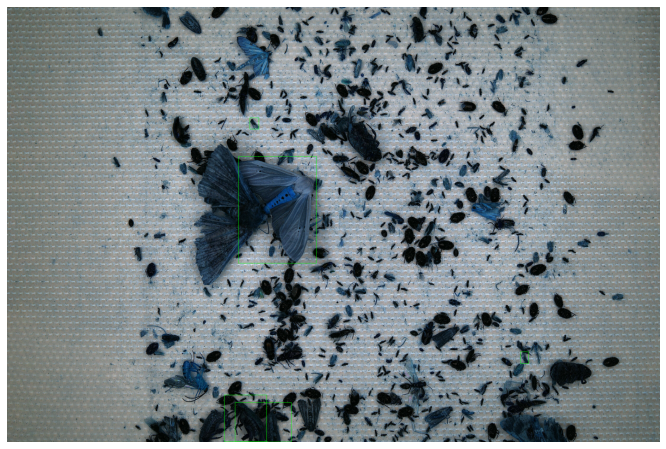

In [28]:
%matplotlib inline
# 随机可视化一个样本
idx = random.randint(0, len(df3) - 1)
# idx=0
img = cv2.imread(os.path.join(DATA2, f'附件1/{df3.iloc[idx].文件名}'))
print(os.path.join(DATA2, f'附件1/{df3.iloc[idx].文件名}'))
def get_box(image_name):
    df_single = df3[df3.im_id == image_name]
    bboxes = list(df_single.bbox)
    leibies= list(df_single.虫子编号)
    # print(leibies)
    box_list = []
    for box in bboxes:
        # print(box+"xx")
        # print([int(float(i)) for i in box.split(',')])
        if box=="1,1,0.0,0.0":
            box_list.append("")
        else:
            box_list.append([int(float(i)) for i in box.split(',')])
        # box_list.append(df_single.im_id)
    return box_list , leibies

box_list,leibies = get_box(df3.iloc[idx].im_id)
# box_list=[[2903,93,595,366]]
print(box_list)
print(leibies)
# print(box_list[4])
# print
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for box in box_list:
    cv2.rectangle(img, (box[0]-(box[2]//2), box[1]-(box[3]//2)), (box[0]+(box[2]//2), box[1]+(box[3]//2)), (0, 255, 0), 2)
ax.set_axis_off()
ax.imshow(img);

In [29]:
df3.head()

,序号,文件名,虫子编号,虫子名称,中心点x坐标,...,ymax,W,H,bbox,im_id
3,4,00008.jpg,7,二化螟,1984,...,2380.0,299.0,460.0,"1984,2150,299.0,460.0",00008
4,5,00008.jpg,228,二点委夜蛾,3301,...,1037.0,523.0,419.0,"3301,827,523.0,419.0",00008
23,24,00043.jpg,222,棉铃虫,4070,...,596.0,874.0,564.0,"4070,314,874.0,564.0",00043
24,25,00045.jpg,10,褐飞虱属,1779,...,571.0,89.0,77.0,"1779,532,89.0,77.0",00045
28,29,00051.jpg,9,白背飞虱,4225,...,432.0,77.0,104.0,"4225,380,77.0,104.0",00051


In [30]:
lei=[6,7,8,9,10,25,41,105,110,115,148,156,222,228,235,256,280,310,387,392,394,398,401,402,430,480,485,673]

In [31]:
lei.index(7)

1

In [32]:
box_list1,leibies1 = get_box("00008")

In [33]:
leibies1[1]

228

In [34]:

# convert [xmin, ymin, width, height] to  [x_center y_center width height]
LABEL = '/home/featurize/data/labels/train'
for fn in tqdm(df3.im_id.unique()):
    box_list,leibies = get_box(fn)
    i=0
    # print(box_list)
    with open(os.path.join(LABEL, f'{fn}.txt'), 'a') as f:
        for box in box_list:
            if leibies[i]==0:
                f.write(f'0 \n')
                break
            else:
                f.write(f'{lei.index(leibies[i])} {(box[0])/5472} {(box[1])/3648} {(box[2])/5472} {(box[3])/3648}\n')
            # f.write(f'0sdadasdasd\n')
            # print(lei.index(leibies[i]))
            i=i+1

100%|██████████| 576/576 [00:00<00:00, 1267.42it/s]


In [35]:
DATA='/home/featurize/data/'

In [36]:
# convert [xmin, ymin, width, height] to  [x_center y_center width height]
yuan="/home/featurize/data/附件1/"
images = '/home/featurize/data/images/train/'
for fn in tqdm(df3.文件名.unique()):
    box_list = get_box(fn)
    shutil.copyfile(yuan+fn,images+fn)
    # with open(os.path.join(iamges, f'{fn}.txt'), 'a') as f:
    #     for box in box_list:
    #         f.write(f'0 {(box[0] + box[2]/2)/5472} {(box[1] + box[3]/2)/3648} {(box[2])/5472} {(box[3])/3648}\n')

100%|██████████| 576/576 [00:03<00:00, 180.05it/s]


In [37]:
tt=pd.DataFrame( os.listdir("/home/featurize/data/images/train"))

In [38]:
tt["im_id"]=tt[0].str.split(".").str[0]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(tt.im_id.unique(), test_size=0.2, random_state=42)

if not os.path.exists(os.path.join(DATA, 'images/val')):
    os.mkdir(os.path.join(DATA, 'images/val'))
if not os.path.exists(os.path.join(DATA, 'labels/val')):
    os.mkdir(os.path.join(DATA, 'labels/val'))

for i in tqdm(X_test):
    try:
        print(DATA+'labels/train/'+i+'.txt')
        shutil.move(os.path.join(DATA, f'images/train/{i}.jpg',), os.path.join(DATA, f'images/val/{i}.jpg'))
        shutil.move(os.path.join(DATA, f'labels/train/{i}.txt',), os.path.join(DATA, f'labels/val/{i}.txt'))
    except:
        print(i, 'not in train')

100%|██████████| 116/116 [00:00<00:00, 4057.40it/s]

/home/featurize/data/labels/train/00388.txt
/home/featurize/data/labels/train/01509.txt
/home/featurize/data/labels/train/00966.txt
/home/featurize/data/labels/train/01966.txt
/home/featurize/data/labels/train/00383.txt
/home/featurize/data/labels/train/01179.txt
/home/featurize/data/labels/train/03496.txt
/home/featurize/data/labels/train/02961.txt
/home/featurize/data/labels/train/01530.txt
/home/featurize/data/labels/train/00393.txt
/home/featurize/data/labels/train/00812.txt
/home/featurize/data/labels/train/03160.txt
/home/featurize/data/labels/train/02830.txt
/home/featurize/data/labels/train/03023.txt
/home/featurize/data/labels/train/01833.txt
/home/featurize/data/labels/train/02486.txt
/home/featurize/data/labels/train/03172.txt
/home/featurize/data/labels/train/02800.txt
/home/featurize/data/labels/train/02780.txt
/home/featurize/data/labels/train/01931.txt
/home/featurize/data/labels/train/00501.txt
/home/featurize/data/labels/train/01069.txt
/home/featurize/data/labels/trai

In [41]:
configs = [
    'path: /home/featurize/data/images/',  # 图片存放的主目录
    'train: train',  # 训练数据集的子目录
    'val: val',  # 交叉验证集的子目录
    'test: test',
    'nc: 28',   # 检测任务需要检测的目标种类数
    'names: ["6","7","8","9","10","25","41","105","110","115","148","156","222","228","235","256","280","310","387","392","394","398","401","402","430","480","485","673"]'  # 每一类的名字，例： ['cat', 'dog', ...]
]

# 将配置文件写入 yaml 文件，下面会用到
with open(os.path.join(DATA, 'dataset.yaml'), 'w') as f:
    for config in configs:
        f.write(f'{config}\n')

In [42]:
import yaml

In [43]:
hyp_yaml = dict(
    lr0 = 0.01,  # initial learning rate (SGD=1E-2, Adam=1E-3)
    lrf = 0.16,  # final OneCycleLR learning rate (lr0 * lrf)
    momentum = 0.937,  # SGD momentum/Adam beta1
    weight_decay = 0.0005,  # optimizer weight decay 5e-4
    warmup_epochs = 5.0,  # warmup epochs (fractions ok)
    warmup_momentum = 0.8,  # warmup initial momentum
    warmup_bias_lr = 0.1,  # warmup initial bias lr
    box = 0.05,  # box loss gain
    cls = 0.3,  # cls loss gain
    cls_pw = 1.0,  # cls BCELoss positive_weight
    obj = 0.7,  # obj loss gain (scale with pixels)
    obj_pw = 1.0,  # obj BCELoss positive_weight
    iou_t = 0.20,  # IoU training threshold
    anchor_t = 4.0,  # anchor-multiple threshold
    fl_gamma = 0.0,  # focal loss gamma (efficientDet default gamma=1.5)
    hsv_h = 0.015,  # image HSV-Hue augmentation (fraction)
    hsv_s = 0.7,  # image HSV-Saturation augmentation (fraction)
    hsv_v = 0.4,  # image HSV-Value augmentation (fraction)
    degrees = 0.0,  # image rotation (+/- deg)
    translate = 0.1,  # image translation (+/- fraction)
    scale = 0.25,  # image scale (+/- gain)
    shear = 0.0,  # image shear (+/- deg)
    perspective = 0.0,  # image perspective (+/- fraction), range 0-0.001
    flipud = 0.0,  # image flip up-down (probability)
    fliplr = 0.5,  # image flip left-right (probability)
    mosaic = 1.0,  # image mosaic (probability)
    mixup = 0.0,  # image mixup (probability)
    copy_paste = 0.0  # segment copy-paste (probability)
    )
with open('./my_hyp_config.yaml', 'w') as f:
    yaml.dump(hyp_yaml, f, default_flow_style=False)

In [44]:
%cat ./my_hyp_config.yaml

anchor_t: 4.0
box: 0.05
cls: 0.3
cls_pw: 1.0
copy_paste: 0.0
degrees: 0.0
fl_gamma: 0.0
fliplr: 0.5
flipud: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
iou_t: 0.2
lr0: 0.01
lrf: 0.16
mixup: 0.0
momentum: 0.937
mosaic: 1.0
obj: 0.7
obj_pw: 1.0
perspective: 0.0
scale: 0.25
shear: 0.0
translate: 0.1
warmup_bias_lr: 0.1
warmup_epochs: 5.0
warmup_momentum: 0.8
weight_decay: 0.0005


In [45]:
model1_yaml = dict(
    nc = 28,  # number of classes
    depth_multiple = 1.33,  # model depth multiple
    width_multiple = 1.25,  # layer channel multiple
    anchors = 3,  # 这里把默认的anchors配置改成了3以启用autoanchor, 获取针对自己训练时的img_size的更优质的anchor size
    
    # YOLOv5 backbone
    backbone =
      # [from, number, module, args]
      [[-1, 1, 'Focus', [64, 3]],  # 0-P1/2
       [-1, 1, 'Conv', [128, 3, 2]],  # 1-P2/4
       [-1, 3, 'C3', [128]],
       [-1, 1, 'Conv', [256, 3, 2]],  # 3-P3/8
       [-1, 9, 'C3', [256]],
       [-1, 1, 'Conv', [512, 3, 2]],  # 5-P4/16
       [-1, 9, 'C3', [512]],
       [-1, 1, 'Conv', [768, 3, 2]],  # 7-P5/32
       [-1, 3, 'C3', [768]],
       [-1, 1, 'Conv', [1024, 3, 2]],  # 9-P6/64
       [-1, 1, 'SPP', [1024, [3, 5, 7]]],
       [-1, 3, 'C3', [1024, 'False']],  # 11
      ],

    # YOLOv5 head
    head =
      [[-1, 1, 'Conv', [768, 1, 1]],
       [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
       [[-1, 8], 1, 'Concat', [1]],  # cat backbone P5
       [-1, 3, 'C3', [768, 'False']],  # 15

       [-1, 1, 'Conv', [512, 1, 1]],
       [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
       [[-1, 6], 1, 'Concat', [1]],  # cat backbone P4
       [-1, 3, 'C3', [512, 'False']],  # 19

       [-1, 1, 'Conv', [256, 1, 1]],
       [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
       [[-1, 4], 1, 'Concat', [1]],  # cat backbone P3
       [-1, 3, 'C3', [256, 'False']],  # 23 (P3/8-small)

       [-1, 1, 'Conv', [256, 3, 2]],
       [[-1, 20], 1, 'Concat', [1]],  # cat head P4
       [-1, 3, 'C3', [512, 'False']],  # 26 (P4/16-medium)

       [-1, 1, 'Conv', [512, 3, 2]],
       [[-1, 16], 1, 'Concat', [1]],  # cat head P5
       [-1, 3, 'C3', [768, 'False']],  # 29 (P5/32-large)

       [-1, 1, 'Conv', [768, 3, 2]],
       [[-1, 12], 1, 'Concat', [1]],  # cat head P6
       [-1, 3, 'C3', [1024, 'False']],  # 32 (P6/64-xlarge)

       [[23, 26, 29, 32], 1, 'Detect', ['nc', 'anchors']],  # Detect(P3, P4, P5, P6)
      ]
    )
with open('./yolov5x6.yaml', 'w') as f:
    yaml.dump(model1_yaml, f, default_flow_style=True)

In [120]:
!python ./yolov5/train.py \
          --data /home/featurize/data/dataset.yaml\
          --cfg ./yolov5x6.yaml \
          --hyp ./my_hyp_config.yaml \
          --cache --exist-ok --multi-scale \
          --project ./Cow_Boy_Outfits_Detection --name yolov5x6 \
          --img-size 1088 --batch-size 1 --epochs 50 --workers 0 --weights yolov5x6.pt  #  实际train了100个epoch

train: weights=yolov5x6.pt, cfg=./yolov5x6.yaml, data=/home/featurize/data/dataset.yaml, hyp=./my_hyp_config.yaml, epochs=50, batch_size=1, imgsz=1088, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=True, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=./Cow_Boy_Outfits_Detection, name=yolov5x6, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12054MiB)

hyperparameters: anchor_t=4.0, box=0.05, cls=0.3, cls_pw=1.0, copy_paste=0.0, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.2, lr0=0.01, lrf=0.16, mixup=0.0, momen

In [46]:
testcsv=pd.read_csv(os.path.join('/home/featurize/data/附件3/无位置信息的图片汇总表.csv'),encoding='gbk')

In [47]:
testcsv.head()

,序号,文件名
0,1,00002.jpg
1,2,00003.jpg
2,3,00005.jpg
3,4,00007.jpg
4,5,00010.jpg


In [48]:
# convert [xmin, ymin, width, height] to  [x_center y_center width height]
yuan="/home/featurize/data/附件1/"
images = '/home/featurize/data/images/test/'
for fn in tqdm(testcsv.文件名.unique()):
    box_list = get_box(fn)
    shutil.copyfile(yuan+fn,images+fn)
    # with open(os.path.join(iamges, f'{fn}.txt'), 'a') as f:
    #     for box in box_list:
    #         f.write(f'0 {(box[0] + box[2]/2)/5472} {(box[1] + box[3]/2)/3648} {(box[2])/5472} {(box[3])/3648}\n')

100%|██████████| 802/802 [00:03<00:00, 201.43it/s]


In [49]:
!python ./yolov5/val.py --weights \
         /home/featurize/work/Cow_Boy_Outfits_Detection/yolov5x6_v2/weights/best.pt\
         --data /home/featurize/data/dataset.yaml \
         --project ./Cow_Boy_Outfits_Detection --name test_960_0.45_0.01_test \
         --task test --augment --save-json --exist-ok \
         --imgsz 1024 --batch-size 1 --iou-thres 0.45 --conf 0.01  # 选取折中一点的imgsz

val: data=/home/featurize/data/dataset.yaml, weights=['/home/featurize/work/Cow_Boy_Outfits_Detection/yolov5x6_v2/weights/best.pt'], batch_size=1, imgsz=1024, conf_thres=0.01, iou_thres=0.45, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=./Cow_Boy_Outfits_Detection, name=test_960_0.45_0.01_test, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12054MiB)

Fusing layers... 
YOLOv5x6 summary: 606 layers, 141255676 parameters, 0 gradients, 221.8 GFLOPs
test: Scanning '/home/featurize/data/labels/test' images and labels...0 found, 8
test: WARNING: /home/featurize/data/images/test/01804.jpg: ignoring corrupt image/label: image file is truncated (0 bytes not processed)
test: WARNING: No labels found in /home/featurize/data/labels/test.cache. See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
test: New cache